# Reading dataset using pandas

In [1]:
import pandas as pd
from pandas import *
import pytz

In [2]:
movies = pd.read_csv('D:\data_science\pandas\ml-latest-small\movies.csv',sep=',')
print(type(movies))
movies.head()

<class 'pandas.core.frame.DataFrame'>


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
tags = pd.read_csv('D:/data_science/pandas/ml-latest-small/tags.csv')
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [4]:
ratings = pd.read_csv('D:/data_science/pandas/ml-latest-small/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
del ratings['timestamp']
del tags['timestamp']

In [6]:
ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [7]:
movies.head()


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
movies.head(1)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


# data Strucutre

## series

In [9]:
row_0 = tags.iloc[2]
type(row_0)

pandas.core.series.Series

In [10]:
row_0

userId                2
movieId           60756
tag        will ferrell
Name: 2, dtype: object

In [11]:
row_0.index

Index(['userId', 'movieId', 'tag'], dtype='object')

In [12]:
row_0['userId']

2

In [13]:
'rating' in 'row_0'

False

In [14]:
row_0 = row_0.rename("first_row")
row_0.name 

'first_row'

# Data Frames

In [15]:
tags.head()

,userId,movieId,tag
0,2,60756,funny
1,2,60756,Highly quotable
2,2,60756,will ferrell
3,2,89774,Boxing story
4,2,89774,MMA


In [16]:
tags.index

RangeIndex(start=0, stop=3683, step=1)

In [17]:
tags.columns

Index(['userId', 'movieId', 'tag'], dtype='object')

In [18]:
tags.iloc[[0,11,1000]]

,userId,movieId,tag
0,2,60756,funny
11,18,431,gangster
1000,474,31,teacher


# Descriptive statistics

In [19]:
ratings['rating'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [20]:
ratings['rating'].mean()

3.501556983616962

In [21]:
ratings['rating'].std()

1.0425292390605359

In [22]:
ratings['rating'].all()

True

In [23]:
ratings['rating'].any()

True

In [24]:
ratings.mean()

userId       326.127564
movieId    19435.295718
rating         3.501557
dtype: float64

In [25]:
movies.mean()

movieId    42200.353623
dtype: float64

In [26]:
movies['movieId'].std()

52160.494854438315

In [27]:
ratings.corr()

,userId,movieId,rating
userId,1.000000,0.006773,-0.049348
movieId,0.006773,1.000000,-0.004061
rating,-0.049348,-0.004061,1.000000


In [28]:
filter_1 = ratings['rating']!=5
filter_1
#

0          True
1          True
2          True
3         False
4         False
          ...  
100831     True
100832    False
100833    False
100834    False
100835     True
Name: rating, Length: 100836, dtype: bool

In [29]:
filter_1.any()

True

In [30]:
print(filter_1)
filter_1.all()

0          True
1          True
2          True
3         False
4         False
          ...  
100831     True
100832    False
100833    False
100834    False
100835     True
Name: rating, Length: 100836, dtype: bool


False

In [31]:
filter_2 = ratings['rating']>0
print(filter_2)
filter_2.all()

0         True
1         True
2         True
3         True
4         True
          ... 
100831    True
100832    True
100833    True
100834    True
100835    True
Name: rating, Length: 100836, dtype: bool


True

# Data Cleaning

In [32]:
movies.shape

(9742, 3)

In [33]:
movies.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

In [34]:
ratings.shape

(100836, 3)

In [35]:
ratings.isnull().any()

userId     False
movieId    False
rating     False
dtype: bool

In [36]:
tags.shape

(3683, 3)

In [37]:
tags.isnull().any()

userId     False
movieId    False
tag        False
dtype: bool

In [38]:
tag = tags.dropna()

In [39]:
tag.isnull().any()

userId     False
movieId    False
tag        False
dtype: bool

# data visualization

In [40]:
print(ratings['rating'].mean())
print(ratings['rating'].std())
print(ratings['rating'].min())
print(ratings['rating'].max())
print(ratings['rating'].any())

3.501556983616962
1.0425292390605359
0.5
5.0
True


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EE20E9BC08>]],
      dtype=object)

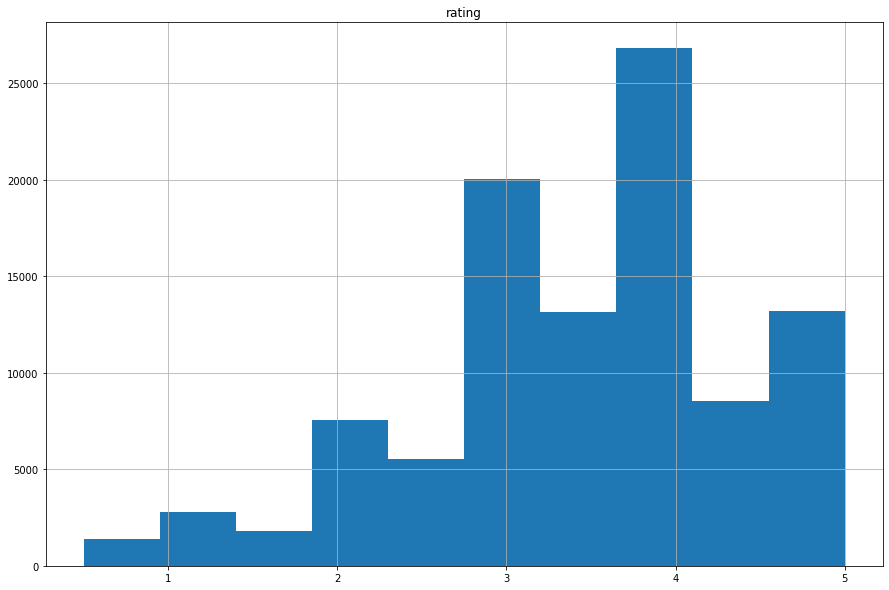

In [41]:
%matplotlib inline

ratings.hist(column='rating',figsize=(15,10))

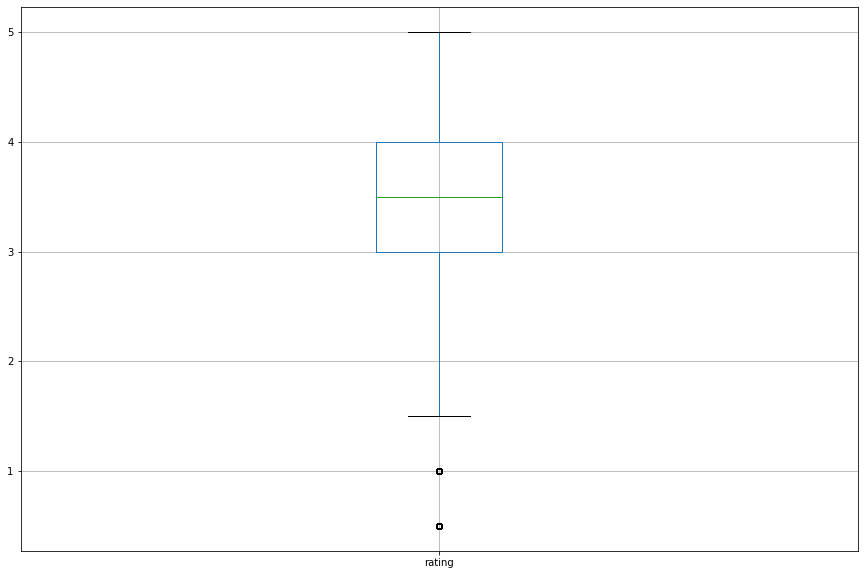

In [42]:
ratings.boxplot(column='rating',figsize=(15,10))

In [43]:
ratings.min()

userId     1.0
movieId    1.0
rating     0.5
dtype: float64

# slicing out columns

In [44]:
tags['tag'].head()

0              funny
1    Highly quotable
2       will ferrell
3       Boxing story
4                MMA
Name: tag, dtype: object

In [45]:
movies[['title','genres']].head()

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


In [46]:
ratings[1000:1020:2]

,userId,movieId,rating
1000,7,31878,3.5
1002,7,32031,1.5
1004,7,32587,3.5
1006,7,33493,1.0
1008,7,33836,1.0
1010,7,34319,4.5
1012,7,38388,3.5
1014,7,45499,4.0
1016,7,45668,1.0
1018,7,46530,1.0


In [47]:
tag_count = tags['tag'].value_counts()
tag_count[:5]

In Netflix queue     131
atmospheric           36
superhero             24
thought-provoking     24
surreal               23
Name: tag, dtype: int64

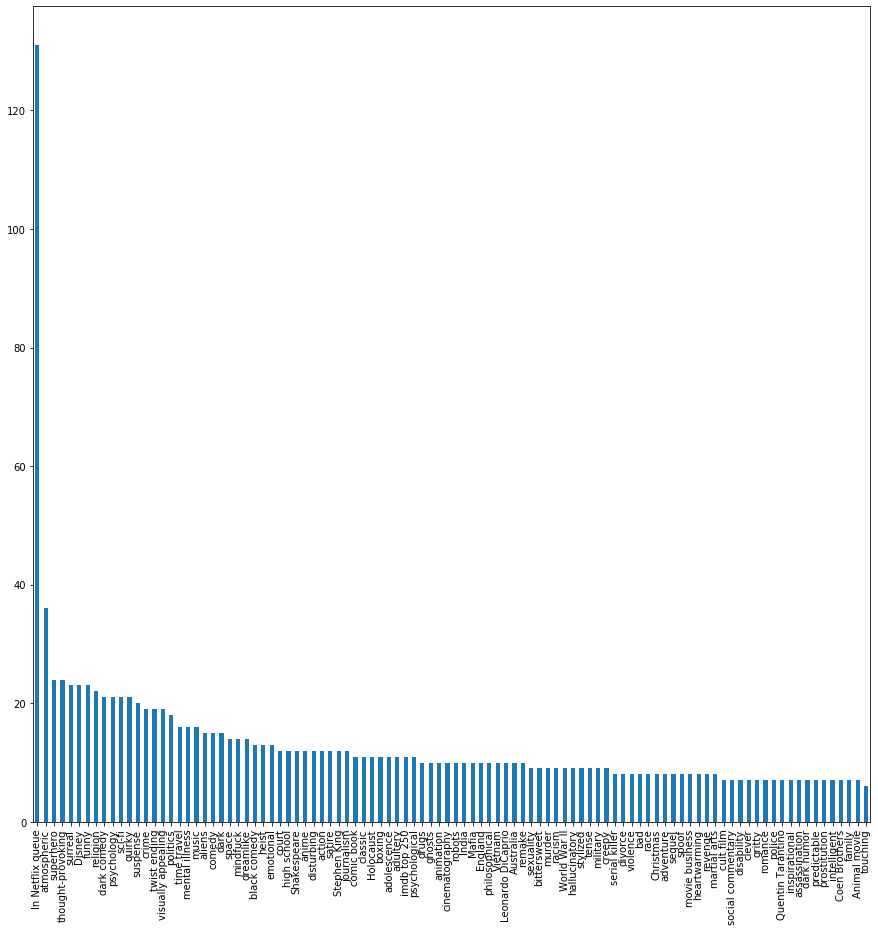

In [48]:
tag_count[:100].plot(kind='bar',figsize=(15,15))

# Filter for selecting rows

In [49]:
is_highly_rated = ratings['rating']>3

In [50]:
ratings[is_highly_rated][-5:]

,userId,movieId,rating
100830,610,166528,4.0
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0


In [51]:
is_animation = movies['genres'].str.contains('Animation')
movies[is_animation][10:30]

,movieId,title,genres
512,595,Beauty and the Beast (1991),Animation|Children|Fantasy|Musical|Romance|IMAX
513,596,Pinocchio (1940),Animation|Children|Fantasy|Musical
522,610,Heavy Metal (1981),Action|Adventure|Animation|Horror|Sci-Fi
527,616,"Aristocats, The (1970)",Animation|Children
534,631,All Dogs Go to Heaven 2 (1996),Adventure|Animation|Children|Fantasy|Musical|R...
551,661,James and the Giant Peach (1996),Adventure|Animation|Children|Fantasy|Musical
559,673,Space Jam (1996),Adventure|Animation|Children|Comedy|Fantasy|Sc...
578,709,Oliver & Company (1988),Adventure|Animation|Children|Comedy|Musical
585,720,Wallace & Gromit: The Best of Aardman Animatio...,Adventure|Animation|Comedy
596,741,Ghost in the Shell (Kôkaku kidôtai) (1995),Animation|Sci-Fi


In [52]:
movies[is_animation].head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
12,13,Balto (1995),Adventure|Animation|Children
44,48,Pocahontas (1995),Animation|Children|Drama|Musical|Romance
205,239,"Goofy Movie, A (1995)",Animation|Children|Comedy|Romance
272,313,"Swan Princess, The (1994)",Animation|Children


# GroupBy and aggregate

In [53]:
ratings_count = ratings[['movieId','rating']].groupby('rating').count()
ratings_count

,movieId
rating,
0.5,1370
1.0,2811
1.5,1791
2.0,7551
2.5,5550
3.0,20047
3.5,13136
4.0,26818
4.5,8551


In [54]:
avg_rating = ratings[['movieId','rating']].groupby('rating').mean()
avg_rating.tail()

,movieId
rating,
3.0,14853.203173
3.5,26388.434074
4.0,17858.161496
4.5,27504.881067
5.0,15638.924154


In [55]:
movie_count = ratings[['movieId','rating']].groupby('movieId').count()
movie_count.head()

,rating
movieId,
1,215
2,110
3,52
4,7
5,49


# Merge Dataframes

In [56]:
tags.head(15)

,userId,movieId,tag
0,2,60756,funny
1,2,60756,Highly quotable
2,2,60756,will ferrell
3,2,89774,Boxing story
4,2,89774,MMA
5,2,89774,Tom Hardy
6,2,106782,drugs
7,2,106782,Leonardo DiCaprio
8,2,106782,Martin Scorsese
9,7,48516,way too long


In [57]:
movies.head(15)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [58]:
t = movies.merge(tags,on = 'movieId', how='inner')
t.head(15)

,movieId,title,genres,userId,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,pixar
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567,fun
3,2,Jumanji (1995),Adventure|Children|Fantasy,62,fantasy
4,2,Jumanji (1995),Adventure|Children|Fantasy,62,magic board game
5,2,Jumanji (1995),Adventure|Children|Fantasy,62,Robin Williams
6,2,Jumanji (1995),Adventure|Children|Fantasy,474,game
7,3,Grumpier Old Men (1995),Comedy|Romance,289,moldy
8,3,Grumpier Old Men (1995),Comedy|Romance,289,old
9,5,Father of the Bride Part II (1995),Comedy,474,pregnancy


In [59]:
avg_rating = ratings.groupby('movieId', as_index=False).mean()
avg_rating.head()

,movieId,userId,rating
0,1,306.530233,3.920930
1,2,329.554545,3.431818
2,3,283.596154,3.259615
3,4,219.857143,2.357143
4,5,299.571429,3.071429


# combine aggregation,merge and filter 

In [60]:
avg_rating = ratings.groupby('movieId', as_index=False).mean()
del avg_rating['userId']
avg_rating.head()

,movieId,rating
0,1,3.920930
1,2,3.431818
2,3,3.259615
3,4,2.357143
4,5,3.071429


In [61]:
box_office = movies.merge(avg_rating,on = 'movieId',how ="inner")
box_office.head(15)

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429
5,6,Heat (1995),Action|Crime|Thriller,3.946078
6,7,Sabrina (1995),Comedy|Romance,3.185185
7,8,Tom and Huck (1995),Adventure|Children,2.875000
8,9,Sudden Death (1995),Action,3.125000
9,10,GoldenEye (1995),Action|Adventure|Thriller,3.496212


In [62]:
is_highly_rated = box_office['rating'] >= 4
box_office[is_highly_rated][:5]

,movieId,title,genres,rating
27,28,Persuasion (1995),Drama|Romance,4.227273
28,29,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi,4.013158
36,40,"Cry, the Beloved Country (1995)",Drama,4.250000
46,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,4.237745
48,53,Lamerica (1994),Adventure|Drama,5.000000


In [63]:
is_comedy = box_office['genres'].str.contains('Comedy')
box_office[is_comedy][:10]

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429
6,7,Sabrina (1995),Comedy|Romance,3.185185
10,11,"American President, The (1995)",Comedy|Drama|Romance,3.671429
11,12,Dracula: Dead and Loving It (1995),Comedy|Horror,2.421053
17,18,Four Rooms (1995),Comedy,3.700000
18,19,Ace Ventura: When Nature Calls (1995),Comedy,2.727273
19,20,Money Train (1995),Action|Comedy|Crime|Drama|Thriller,2.500000


In [64]:
box_office[is_comedy & is_highly_rated][:5]

,movieId,title,genres,rating
52,58,"Postman, The (Postino, Il) (1994)",Comedy|Drama|Romance,4.027027
94,106,Nobody Loves Me (Keiner liebt mich) (1994),Comedy|Drama,4.000000
148,176,Living in Oblivion (1995),Comedy,4.307692
158,187,Party Girl (1995),Comedy,4.125000
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.197068


# String operation

In [65]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


spliting genres into multiple coloumns

In [66]:
movie_genres = movies['genres'].str.split('|',expand =True)

In [67]:
movie_genres[:10]

,0,1,2,3,4,5,6,7,8,9
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None
2,Comedy,Romance,None,None,None,None,None,None,None,None
3,Comedy,Drama,Romance,None,None,None,None,None,None,None
4,Comedy,None,None,None,None,None,None,None,None,None
5,Action,Crime,Thriller,None,None,None,None,None,None,None
6,Comedy,Romance,None,None,None,None,None,None,None,None
7,Adventure,Children,None,None,None,None,None,None,None,None
8,Action,None,None,None,None,None,None,None,None,None
9,Action,Adventure,Thriller,None,None,None,None,None,None,None


In [68]:
movies['year'] = movies['title'].str.extract('.*\((.*)\).*', expand=True)

In [69]:
movies.tail()

,movieId,title,genres,year
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,2017
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,2017
9739,193585,Flint (2017),Drama,2017
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,2018
9741,193609,Andrew Dice Clay: Dice Rules (1991),Comedy,1991


# Parsing Timestamp

In [70]:
tags = pd.read_csv('D:/data_science/pandas/ml-latest-small/tags.csv')
tags.dtypes

userId        int64
movieId       int64
tag          object
timestamp     int64
dtype: object

In [71]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [72]:
tags['parsed_time'] = pd.to_datetime(tags['timestamp'], unit='s')

In [73]:
tags['parsed_time'].dtype

dtype('<M8[ns]')

In [74]:
greater_than_t = tags['parsed_time']>'06-12-1997'
selected_rows = tags[greater_than_t]
tags.shape,selected_rows.shape

((3683, 5), (3683, 5))

In [75]:
tags.sort_values(by='parsed_time',ascending=True)[:10]

,userId,movieId,tag,timestamp,parsed_time
1756,474,3181,Shakespeare,1137179352,2006-01-13 19:09:12
2212,474,6912,Rita Hayworth can dance!,1137179371,2006-01-13 19:09:31
1636,474,2494,Hungary,1137179426,2006-01-13 19:10:26
1635,474,2494,Holocaust,1137179426,2006-01-13 19:10:26
1497,474,1836,No DVD at Netflix,1137179444,2006-01-13 19:10:44
1961,474,4969,In Netflix queue,1137179563,2006-01-13 19:12:43
2409,474,26242,In Netflix queue,1137179570,2006-01-13 19:12:50
2413,474,27741,In Netflix queue,1137179587,2006-01-13 19:13:07
2231,474,7025,In Netflix queue,1137179593,2006-01-13 19:13:13
2485,474,41997,In Netflix queue,1137179603,2006-01-13 19:13:23


In [76]:
ratings = pd.read_csv('D:/data_science/pandas/ml-latest-small/ratings.csv')
ratings.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

In [77]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [78]:
ratings['parsed_time'] = pd.to_datetime(ratings['timestamp'],unit = 's')

In [79]:
ratings['parsed_time'].dtype

dtype('<M8[ns]')

In [80]:
ratings.head()

,userId,movieId,rating,timestamp,parsed_time
0,1,1,4.0,964982703,2000-07-30 18:45:03
1,1,3,4.0,964981247,2000-07-30 18:20:47
2,1,6,4.0,964982224,2000-07-30 18:37:04
3,1,47,5.0,964983815,2000-07-30 19:03:35
4,1,50,5.0,964982931,2000-07-30 18:48:51


In [90]:
greater_than_t = ratings['parsed_time']> '06-12-1997'
selected_rows = ratings[greater_than_t]
ratings.shape,selected_rows.shape

((100836, 5), (0, 5))

In [89]:
selected_rows[-10:]

,userId,movieId,rating,timestamp,parsed_time
100826,610,162350,3.5,1493849971,2017-05-03 22:19:31
100827,610,163937,3.5,1493848789,2017-05-03 21:59:49
100828,610,163981,3.5,1493850155,2017-05-03 22:22:35
100829,610,164179,5.0,1493845631,2017-05-03 21:07:11
100830,610,166528,4.0,1493879365,2017-05-04 06:29:25
100831,610,166534,4.0,1493848402,2017-05-03 21:53:22
100832,610,168248,5.0,1493850091,2017-05-03 22:21:31
100833,610,168250,5.0,1494273047,2017-05-08 19:50:47
100834,610,168252,5.0,1493846352,2017-05-03 21:19:12
100835,610,170875,3.0,1493846415,2017-05-03 21:20:15
